In [1]:
import pandas as pd
import numpy as np

In [2]:
idx = pd.date_range('20200101 8:26:35', '20200101 9:31:58', freq='77s')
data = np.random.randint(-1,2,len(idx)).cumsum()
s = pd.Series(data,index=idx)
s.head()

2020-01-01 08:26:35   -1
2020-01-01 08:27:52    0
2020-01-01 08:29:09    0
2020-01-01 08:30:26    1
2020-01-01 08:31:43    1
Freq: 77S, dtype: int32

In [16]:
idx = pd.date_range('20191231', '20200401', freq='D')
data = np.ones(len(idx))#.cumsum()
s = pd.Series(data,index=idx)
display(s.head())
s.resample('M', closed='left').sum()

2019-12-31    1.0
2020-01-01    1.0
2020-01-02    1.0
2020-01-03    1.0
2020-01-04    1.0
Freq: D, dtype: float64

2020-01-31    31.0
2020-02-29    29.0
2020-03-31    31.0
2020-04-30     2.0
Freq: M, dtype: float64

In [15]:
s.tail()

2020-03-28    1.0
2020-03-29    1.0
2020-03-30    1.0
2020-03-31    1.0
2020-04-01    1.0
Freq: D, dtype: float64

In [5]:
s.resample('7min', origin='end').mean().head()

ValueError: 'origin' should be equal to 'epoch', 'start', 'start_day' or should be a Timestamp convertible type. Got 'end' instead.

In [2]:
idx = pd.date_range('20200101', '20201231', freq='B')
np.random.seed(2020)
data = np.random.randint(-1,2,len(idx)).cumsum() # 随机游动构造模拟序列
s = pd.Series(data,index=idx)

In [7]:
my_series = pd.Series(s.index)
my_series.head()
my_series.diff(1).value_counts()

1 days    209
3 days     52
dtype: int64

In [6]:
my_series.head()

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-06
4   2020-01-07
dtype: datetime64[ns]

In [4]:
s = pd.Series(['2020-1-2', 'af', '25346'])
s[pd.to_datetime(s, errors='coerce').isna()]

1       af
2    25346
dtype: object

In [4]:
df = pd.read_csv('../data/learn_pandas.csv', usecols=['Test_Date', 'Time_Record'])
df.head(2)

,Test_Date,Time_Record
0,2019/10/5,0:04:34
1,2019/9/4,0:04:20


In [41]:
pd.date_range('2020-1-1','2020-1-21', freq='10D')

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21'], dtype='datetime64[ns]', freq='10D')

In [47]:
dt_index = pd.date_range('2020-1-1','2020-1-10', freq='D')
s = pd.Series(np.random.rand(5),
              index=pd.to_datetime([
                  '2020-1-%d'%i for i in range(1,10,2)]))
s
dt_index.to_series().dt.freq

'D'

In [34]:
s=pd.Series(np.random.rand(5),
                index=pd.to_datetime([
                    '2020-1-%d'%i for i in range(1,10,2)]))
s.asfreq('12H')

2020-01-01 00:00:00    0.000913
2020-01-01 12:00:00         NaN
2020-01-02 00:00:00         NaN
2020-01-02 12:00:00         NaN
2020-01-03 00:00:00    0.694893
2020-01-03 12:00:00         NaN
2020-01-04 00:00:00         NaN
2020-01-04 12:00:00         NaN
2020-01-05 00:00:00    0.866345
2020-01-05 12:00:00         NaN
2020-01-06 00:00:00         NaN
2020-01-06 12:00:00         NaN
2020-01-07 00:00:00    0.358883
2020-01-07 12:00:00         NaN
2020-01-08 00:00:00         NaN
2020-01-08 12:00:00         NaN
2020-01-09 00:00:00    0.630066
Freq: 12H, dtype: float64

In [74]:
s = pd.Series(pd.date_range('2020-1-1 20:35:00','2020-1-1 22:35:00', freq='45min'))
s.dt.ceil('1H')

0   2020-01-01 21:00:00
1   2020-01-01 22:00:00
2   2020-01-01 23:00:00
dtype: datetime64[ns]

In [176]:
pd.Series(pd.offsets.CDay(3,weekmask='Wed Fri',holidays='2020010').apply(i)
                                  for i in pd.date_range('20200105',periods=3,freq='D'))

0   2020-01-15
1   2020-01-15
2   2020-01-15
dtype: datetime64[ns]

In [203]:
pd.date_range('20200108','20200111').to_series().dt.dayofweek# + pd.offsets.CDay(weekmask='Wed Fri',holidays='2020010')

2020-01-08    2
2020-01-09    3
2020-01-10    4
2020-01-11    5
Freq: D, dtype: int64

In [239]:
pd.date_range('20200101','20200201', freq='WOM-1MON')

DatetimeIndex(['2020-01-06'], dtype='datetime64[ns]', freq='WOM-1MON')

In [168]:
idx = pd.date_range('20200101 8:26:35', '20200101 9:31:58', freq='77s')
data = np.random.randint(-1,2,len(idx)).cumsum()
s = pd.Series(data,index=idx)
s.resample('7min').mean()

2020-01-01 08:24:00   -1.250000
2020-01-01 08:31:00    0.800000
2020-01-01 08:38:00    5.166667
2020-01-01 08:45:00    7.600000
2020-01-01 08:52:00    9.166667
2020-01-01 08:59:00    8.600000
2020-01-01 09:06:00    9.333333
2020-01-01 09:13:00    8.800000
2020-01-01 09:20:00    9.333333
2020-01-01 09:27:00    8.333333
Freq: 7T, dtype: float64

In [171]:
s = pd.Series([1,2,3,4,5],pd.to_datetime(['20200101','20200102','20200103','20200104','20200105']))
s.resample('2D').mean()

2020-01-01    1.5
2020-01-03    3.5
2020-01-05    5.0
Freq: 2D, dtype: float64

In [111]:
idx = pd.date_range('20200101 8:26:35', '20200101 9:31:58', freq='77s')
data = np.random.randint(-1,2,len(idx)).cumsum()
s = pd.Series(data,index=idx)
s.resample('5min', origin='start').mean()

2020-01-01 08:26:35   -0.50
2020-01-01 08:31:35   -2.00
2020-01-01 08:36:35   -3.50
2020-01-01 08:41:35   -5.75
2020-01-01 08:46:35   -6.00
2020-01-01 08:51:35   -6.50
2020-01-01 08:56:35   -8.25
2020-01-01 09:01:35   -9.75
2020-01-01 09:06:35   -9.00
2020-01-01 09:11:35   -7.00
2020-01-01 09:16:35   -6.50
2020-01-01 09:21:35   -8.00
2020-01-01 09:26:35   -8.75
Freq: 5T, dtype: float64

In [116]:
s[::-1].resample('5min', origin='start').mean()

2020-01-01 08:26:35   -0.50
2020-01-01 08:31:35   -2.00
2020-01-01 08:36:35   -3.50
2020-01-01 08:41:35   -5.75
2020-01-01 08:46:35   -6.00
2020-01-01 08:51:35   -6.50
2020-01-01 08:56:35   -8.25
2020-01-01 09:01:35   -9.75
2020-01-01 09:06:35   -9.00
2020-01-01 09:11:35   -7.00
2020-01-01 09:16:35   -6.50
2020-01-01 09:21:35   -8.00
2020-01-01 09:26:35   -8.75
Freq: 5T, dtype: float64

In [117]:
s[::-1]

2020-01-01 09:30:45    -8
2020-01-01 09:29:28    -9
2020-01-01 09:28:11    -9
2020-01-01 09:26:54    -9
2020-01-01 09:25:37    -8
2020-01-01 09:24:20    -9
2020-01-01 09:23:03    -8
2020-01-01 09:21:46    -7
2020-01-01 09:20:29    -6
2020-01-01 09:19:12    -7
2020-01-01 09:17:55    -6
2020-01-01 09:16:38    -7
2020-01-01 09:15:21    -6
2020-01-01 09:14:04    -7
2020-01-01 09:12:47    -8
2020-01-01 09:11:30    -8
2020-01-01 09:10:13    -9
2020-01-01 09:08:56   -10
2020-01-01 09:07:39    -9
2020-01-01 09:06:22   -10
2020-01-01 09:05:05    -9
2020-01-01 09:03:48   -10
2020-01-01 09:02:31   -10
2020-01-01 09:01:14    -9
2020-01-01 08:59:57    -9
2020-01-01 08:58:40    -8
2020-01-01 08:57:23    -7
2020-01-01 08:56:06    -8
2020-01-01 08:54:49    -7
2020-01-01 08:53:32    -6
2020-01-01 08:52:15    -5
2020-01-01 08:50:58    -6
2020-01-01 08:49:41    -6
2020-01-01 08:48:24    -6
2020-01-01 08:47:07    -6
2020-01-01 08:45:50    -6
2020-01-01 08:44:33    -5
2020-01-01 08:43:16    -6
2020-01-01 0

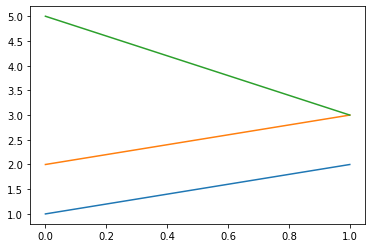

In [73]:
plt.plot([[1,2,5],[2,3,3]])